In [1]:
import simulator.lennard_lammps
import numpy as np
import pandas as pd
import h5py
import importlib
from matplotlib import pyplot as plt
importlib.reload(simulator.lennard_lammps)
SimulatorLennardLammps = simulator.lennard_lammps.SimulatorLennardLammps
from simulator import SimulatorLennard, SimulatorMagnetic
from simulator.hdf5IO import Simulation, Client_HDF5
from tqdm.notebook import tqdm
from collections import defaultdict
import os
from settings import HDF5_PATH
from utils.utils import beep
from utils.runners import multirunner


scale=2.5
params_model = {
    "group_name" : "eER 3.1",
    "cls": "SimulatorLennardLammps",
    "R" : 1.0*scale,
    "Rz" : 0.25*scale,
    "Bz" : 0,
    "eccentricity": 0.06,
    "sigma":0.05,
    "epsilon":0.1,
}
params_init = {
    "energy": 1,
    "sigma_grid":1,
    "position_random_shift_percentage": 0.0/100,
    "angular_momentum_factor" : 0.95,
    # "angular_momentum" : 0,
    "planar": False,
    "zero_momentum": False,
}
params_simulation = {
    "warmup":5000,
    "iteration_time" : 30000,
    "dt" : 1e-3,
    "record_interval" : 1e-1,
    "particle_properties":False,
    "total_properties": True
}

In [2]:
%%time
sim_lammps = SimulatorLennardLammps(**params_model)
sim_lammps.init_positions_closepack(**params_init)
sim_lammps.init_velocities(**params_init)
print(sim_lammps.particle_number())
print(sim_lammps.get_simulation_command())
# sim_lammps.simulate(**params_simulation, run_lammps=True)

55
.lammps_build/lmp -sf omp -in "./tmp_lammps/5626f12a7a6cd4ad.in"
CPU times: user 3.06 ms, sys: 911 µs, total: 3.97 ms
Wall time: 3.51 ms


In [3]:
a = (1/sim_lammps.abc[0] + 1/sim_lammps.abc[1])/2
eps = (1/sim_lammps.abc[1] - 1/sim_lammps.abc[0])/2
a, eps

(0.4000001625851419, 0.00036064960827475456)

In [4]:
a*eps**2

5.2027277126640557e-08

In [5]:
n_ = 10 #cpu_count()
params = []
for epsilon in np.logspace(-2, 0, n_):
#     params_model["epsilon"] = 0.1
    params.append( (params_model.copy(), params_init.copy(), params_simulation.copy()) )

In [6]:
def callback(sim):
    return pd.DataFrame(sim.get_history()).set_index("time")

In [7]:
res = multirunner(params, 
            callback=callback
            )
beep()

LAMMPS command:
LAMMPS command:.lammps_build/lmp -sf omp -in "./tmp_lammps/573f8b53615b9bd7.in"

.lammps_build/lmp -sf omp -in "./tmp_lammps/26ea317a7327cdab.in"
LAMMPS command:LAMMPS command:
LAMMPS command:
.lammps_build/lmp -sf omp -in "./tmp_lammps/9e3bc098654e09c7.in"LAMMPS command:.lammps_build/lmp -sf omp -in "./tmp_lammps/195bee30d7302e1b.in"



.lammps_build/lmp -sf omp -in "./tmp_lammps/b6b35019fa57d948.in"LAMMPS command:.lammps_build/lmp -sf omp -in "./tmp_lammps/48f278a1d55584a6.in"LAMMPS command:


.lammps_build/lmp -sf omp -in "./tmp_lammps/0a6ddaceb3377aab.in"LAMMPS command:


.lammps_build/lmp -sf omp -in "./tmp_lammps/e7b123d2e9f094d7.in".lammps_build/lmp -sf omp -in "./tmp_lammps/184e402e5078b2cf.in"

LAMMPS command:
.lammps_build/lmp -sf omp -in "./tmp_lammps/5516b781d938ea84.in"
--------------------------------------------------------------------------
[[7720,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network i

  0%|          | 0/9 [00:00<?, ?it/s]

Simulation has finished!
Processing the dump files...
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
using multi-threaded neighbor list subroutines
Reading data file ...
  orthogonal box = (-25.022551 -24.97747 -6.25) to (25.022551 24.97747 6.25)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  55 atoms
  reading velocities ...
  55 velocities
  read_data CPU = 0.001 seconds
55 atoms in group my_atoms
55 atoms in group my_subset
Generated 0 of 0 mixed pair_coeff terms from geometric mixing rule
Last active /omp style is pair_style lj/cut/omp
Neighbor list info ...
  update: every = 30 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 0.5
  ghost atom cutoff = 0.5
  binsize = 0.25, bins = 201 200 50
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut/omp, perpetual
      attributes: half, newton on, omp
      pair build: ha

Simulation has finished!
Processing the dump files...
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
using multi-threaded neighbor list subroutines
Reading data file ...
  orthogonal box = (-25.022551 -24.97747 -6.25) to (25.022551 24.97747 6.25)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  55 atoms
  reading velocities ...
  55 velocities
  read_data CPU = 0.002 seconds
55 atoms in group my_atoms
55 atoms in group my_subset
Generated 0 of 0 mixed pair_coeff terms from geometric mixing rule
Last active /omp style is pair_style lj/cut/omp
Neighbor list info ...
  update: every = 30 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 0.5
  ghost atom cutoff = 0.5
  binsize = 0.25, bins = 201 200 50
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut/omp, perpetual
      attributes: half, newton on, omp
      pair build: ha

 11%|█         | 1/9 [00:15<02:01, 15.23s/it]

Simulation has finished!
Processing the dump files...
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
using multi-threaded neighbor list subroutines
Reading data file ...
  orthogonal box = (-25.022551 -24.97747 -6.25) to (25.022551 24.97747 6.25)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  55 atoms
  reading velocities ...
  55 velocities
  read_data CPU = 0.001 seconds
55 atoms in group my_atoms
55 atoms in group my_subset
Generated 0 of 0 mixed pair_coeff terms from geometric mixing rule
Last active /omp style is pair_style lj/cut/omp
Neighbor list info ...
  update: every = 30 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 0.5
  ghost atom cutoff = 0.5
  binsize = 0.25, bins = 201 200 50
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut/omp, perpetual
      attributes: half, newton on, omp
      pair build: ha

 22%|██▏       | 2/9 [00:18<00:55,  7.94s/it]

Simulation has finished!
Processing the dump files...
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
using multi-threaded neighbor list subroutines
Reading data file ...
  orthogonal box = (-25.022551 -24.97747 -6.25) to (25.022551 24.97747 6.25)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  55 atoms
  reading velocities ...
  55 velocities
  read_data CPU = 0.001 seconds
55 atoms in group my_atoms
55 atoms in group my_subset
Generated 0 of 0 mixed pair_coeff terms from geometric mixing rule
Last active /omp style is pair_style lj/cut/omp
Neighbor list info ...
  update: every = 30 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 0.5
  ghost atom cutoff = 0.5
  binsize = 0.25, bins = 201 200 50
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut/omp, perpetual
      attributes: half, newton on, omp
      pair build: ha

 33%|███▎      | 3/9 [00:26<00:47,  7.98s/it]

OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
using multi-threaded neighbor list subroutines
Reading data file ...
  orthogonal box = (-25.022551 -24.97747 -6.25) to (25.022551 24.97747 6.25)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  55 atoms
  reading velocities ...
  55 velocities
  read_data CPU = 0.001 seconds
55 atoms in group my_atoms
55 atoms in group my_subset
Generated 0 of 0 mixed pair_coeff terms from geometric mixing rule
Last active /omp style is pair_style lj/cut/omp
Neighbor list info ...
  update: every = 30 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 0.5
  ghost atom cutoff = 0.5
  binsize = 0.25, bins = 201 200 50
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut/omp, perpetual
      attributes: half, newton on, omp
      pair build: half/bin/atomonly/newton/omp
      stencil: half/bin/3d


 44%|████▍     | 4/9 [00:27<00:26,  5.35s/it]

Simulation has finished!
Processing the dump files...
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
using multi-threaded neighbor list subroutines
Reading data file ...
  orthogonal box = (-25.022551 -24.97747 -6.25) to (25.022551 24.97747 6.25)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  55 atoms
  reading velocities ...
  55 velocities
  read_data CPU = 0.001 seconds
55 atoms in group my_atoms
55 atoms in group my_subset
Generated 0 of 0 mixed pair_coeff terms from geometric mixing rule
Last active /omp style is pair_style lj/cut/omp
Neighbor list info ...
  update: every = 30 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 0.5
  ghost atom cutoff = 0.5
  binsize = 0.25, bins = 201 200 50
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut/omp, perpetual
      attributes: half, newton on, omp
      pair build: ha

100%|██████████| 9/9 [00:35<00:00,  3.94s/it]


In [8]:
import logging

logging.config.fileConfig("/home/ashmat/telegramLogConfig")

logger = logging.getLogger("telegram")

logger.info("gamma_estimate analyse autocorr grid done!")

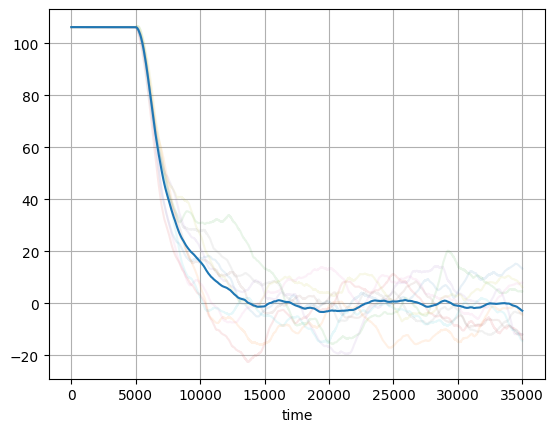

In [9]:
df = pd.DataFrame([x["total/L"] for x in res]).T
df.loc[:].plot(alpha=0.1)
df.loc[:].mean(axis=1).plot()
plt.gca().get_legend().remove()
ax = plt.gca()
plt.grid()

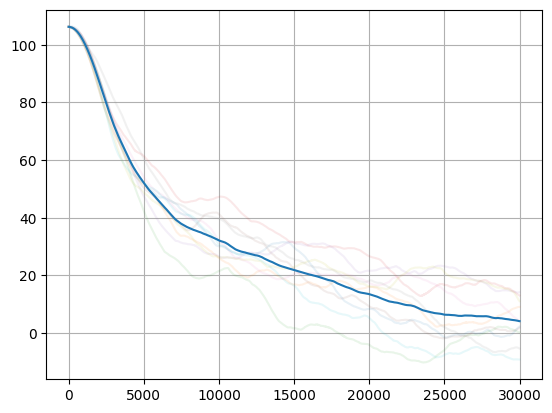

In [105]:
# ecc = 0.04
df = pd.DataFrame([(x["L"]).sum(axis=1) for x,_ in res]).T
df.loc[:].plot(alpha=0.1)
df.loc[:].mean(axis=1).plot()
plt.gca().get_legend().remove()
ax = plt.gca()
plt.grid()

/data/biophys/ashmat/tmp/ipykernel_29955/3743352020.py:5: RuntimeWarning: invalid value encountered in log10
  np.polyfit(sr.index.values, np.log10(sr.values), deg=1)


array([nan, nan])

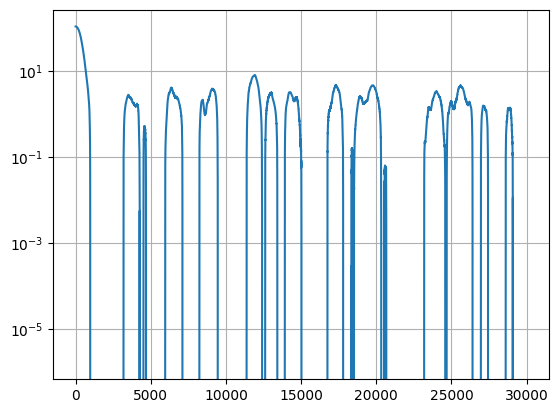

In [84]:
df.loc[:].mean(axis=1).plot()
plt.yscale("log")
plt.grid()
sr = df.loc[3000:20000].mean(axis=1)
np.polyfit(sr.index.values, np.log10(sr.values), deg=1)

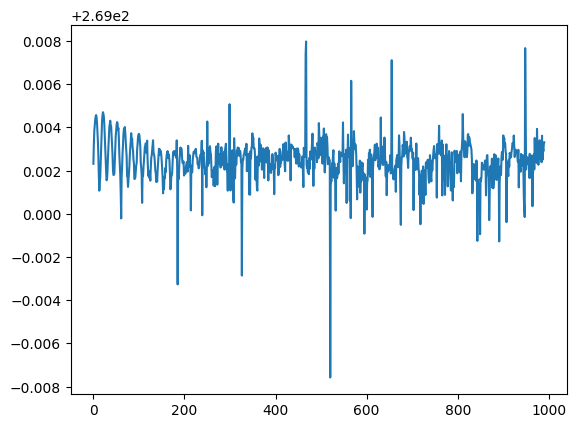

In [27]:
plt.plot(sim_lammps.history["E"].sum(axis=1)[10:])

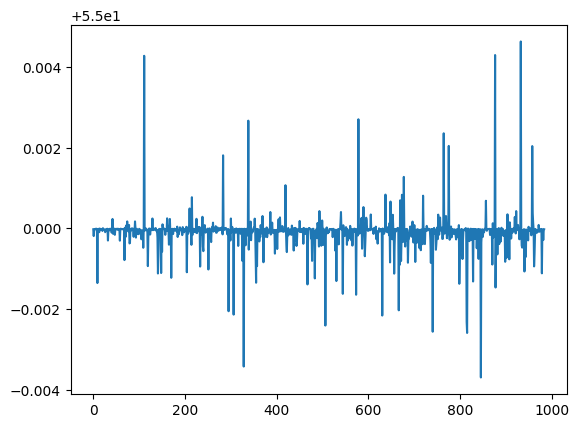

In [145]:
sim.history["E"] = sim.history["KE"] + sim.history["PE"] + 0.5* sim.history["IE"]
plt.plot(sim.history["E"].sum(axis=1)[10:-10])

In [113]:
sim.history["KE"] + 

[]

In [64]:
sim_lammps.history["rs"][:, 0,0]

array([-0.69282, -0.69282, -0.69282, ..., -0.69282, -0.69282, -0.69282])

In [46]:
sim_lammps.load_lammps_dumps();

In [78]:
rs, vs, ts = sim_lammps.history["rs"], sim_lammps.history["vs"], sim_lammps.history["time"]
sub_history = defaultdict(list)

for i in tqdm(range(len(rs))):
    metrics = sim_lammps.other_metrics(rs[i], vs[i], ts[i])
    for key in metrics:
        sub_history["_"+key].append(metrics[key])

for key, value in sub_history.items():
    sub_history[key] = np.array(value)
    
sim_lammps.history.update(sub_history)

  0%|          | 0/10001 [00:00<?, ?it/s]

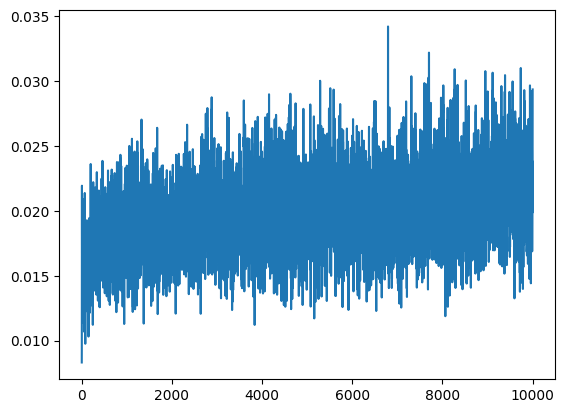

In [81]:
plt.plot(sim_lammps.history["IE"].sum(axis=1) - sim_lammps.history["_IE"].sum(axis=1))
# plt.plot(sim_lammps.history["_IE"].sum(axis=1))
# plt.plot(sim.history["IE"].sum(axis=1))

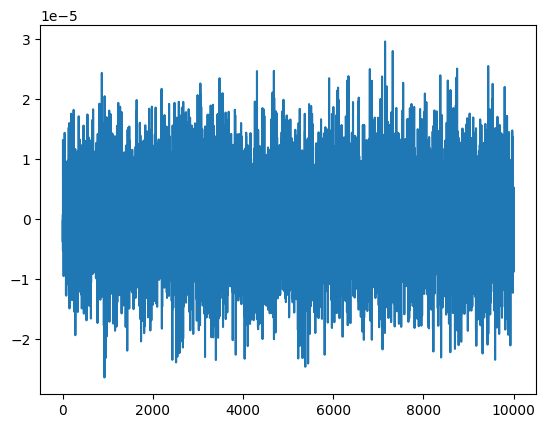

In [83]:
plt.plot(sim_lammps.history["PE"].sum(axis=1) - sim_lammps.history["_PE"].sum(axis=1))

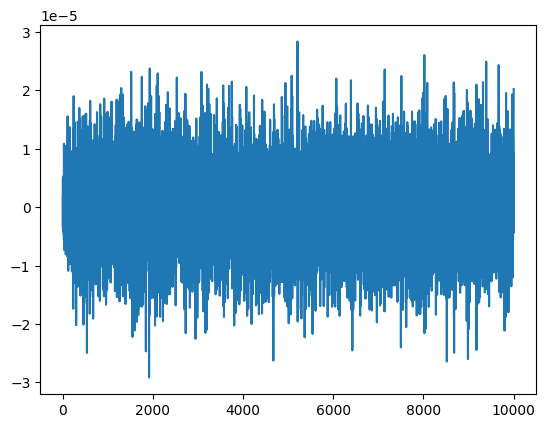

In [84]:
plt.plot(sim_lammps.history["KE"].sum(axis=1) - sim_lammps.history["_KE"].sum(axis=1))

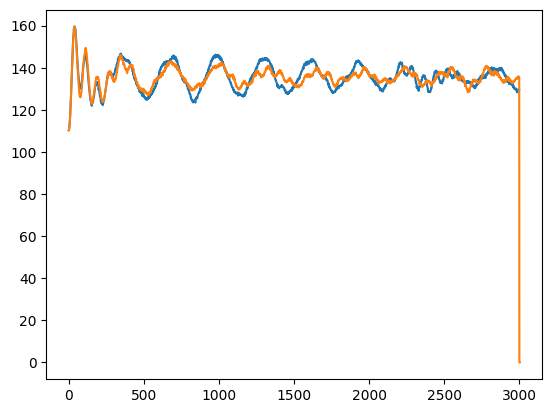

In [19]:
plt.plot(sim_lammps.history["KE"].sum(axis=1))
plt.plot(sim.history["KE"].sum(axis=1))

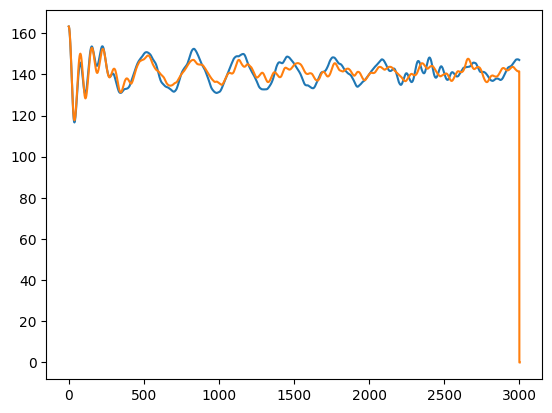

In [20]:
plt.plot(sim_lammps.history["PE"].sum(axis=1))
plt.plot(sim.history["PE"].sum(axis=1))

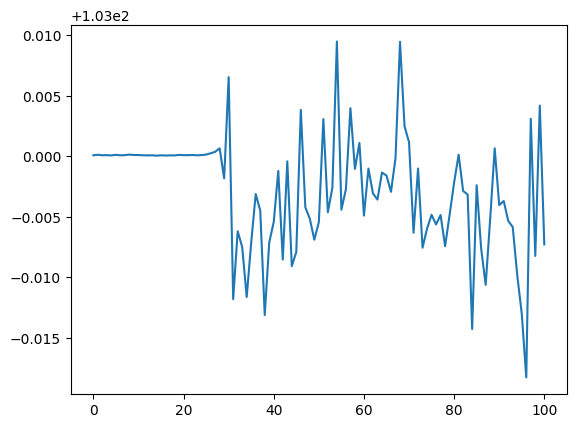

In [98]:
plt.plot(sim_lammps.history["E"].sum(axis=1))

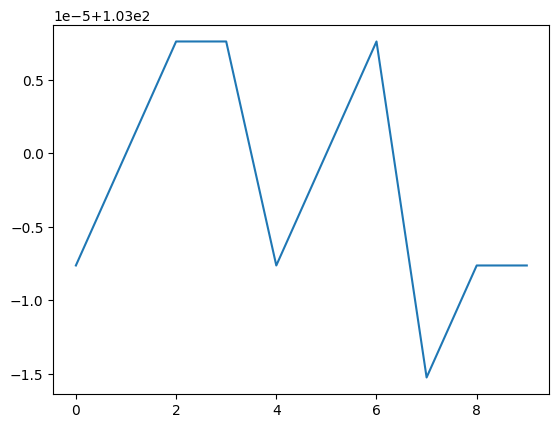

In [99]:
plt.plot((sim.history["KE"].sum(axis=1)+sim.history["PE"].sum(axis=1)+0.5*sim.history["IE"].sum(axis=1) )[:10])

In [101]:
f = open(file, "r")
N = sim.particle_number()

for line in iter(f.readline, ''):
    line = f.readline()
    if "ATOMS" == line[6:11]:
        data = []
        for i in range(N):
            line = list(map(float, f.readline().strip().split()))
            data.append(line)
    if line == '':
        break

NameError: name 'file' is not defined

In [10]:
N

273

In [5]:
f.readline(2)

'0\n'

In [32]:
import h5py

In [34]:
with h5py.File("dump_h5md.h5") as ds:
    print(ds.keys())

<KeysViewHDF5 ['h5md', 'observables', 'parameters', 'particles']>


In [35]:
ds = h5py.File("dump_h5md.h5")

In [37]:
ds.keys()

<KeysViewHDF5 ['h5md', 'observables', 'parameters', 'particles']>

In [54]:
ds['particles']["all"]["box"]["edges"].keys()

<KeysViewHDF5 ['step', 'time', 'value']>

In [47]:
ds['h5md']['creator'].keys()

<KeysViewHDF5 []>

## Load Simulation

In [6]:
hash_ = '9ae352619998a24b'

In [10]:
item = Client_HDF5(os.path.join(HDF5_PATH, hash_+".hdf5")).load()

In [13]:
sim_lammps = SimulatorLennardLammps(item=item)

In [15]:
rs, vs, ts = sim_lammps.history["rs"], sim_lammps.history["vs"], sim_lammps.history["time"]
sub_history = defaultdict(list)

for i in tqdm(range(len(rs))):
    metrics = sim_lammps.other_metrics(rs[i], vs[i], ts[i])
    for key in metrics:
        sub_history["_"+key].append(metrics[key])

for key, value in sub_history.items():
    sub_history[key] = np.array(value)
    
sim_lammps.history.update(sub_history)

  0%|          | 0/250001 [00:00<?, ?it/s]

In [16]:
sim_lammps.history.keys()

dict_keys(['E', 'IE', 'KE', 'L', 'PE', 'force', 'rs', 'time', 'vs', '_KE', '_PE', '_IE', '_L', '_OMEGA', '_LJ_force', '_collisions'])

In [17]:
sim_lammps.history["_E"] = sim_lammps.history["_KE"] + sim_lammps.history["_PE"] + 0.5* sim_lammps.history["_IE"]

In [19]:
sim_lammps.history["_E"].shape

(250001, 523)

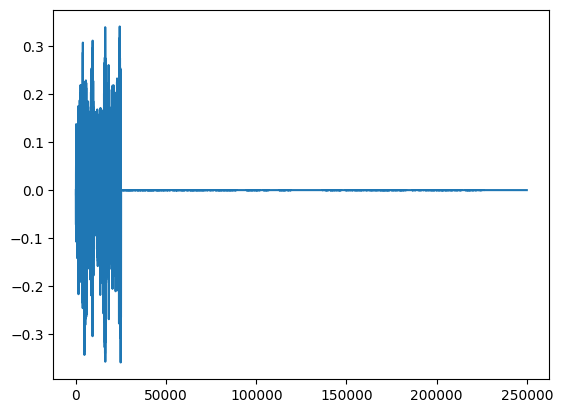

In [24]:
plt.plot(sim_lammps.history["_PE"].sum(axis=1) - sim_lammps.history["PE"].sum(axis=1))